In [57]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    database='mypractice'
)

In [6]:
query = "SELECT * FROM retail_staging_2"

In [8]:
df = pd.read_sql(query, connection)

C:\Users\novit\AppData\Local\Temp\ipykernel_17760\1848774206.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [12]:
df

,Transaction_ID,Customer_ID,Category,Item,Price_Per_Unit,Quantity,Total_Spent,Payment_Method,Location,Transaction_Date
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02
...,...,...,...,...,...,...,...,...,...,...
11966,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03
11967,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12
11968,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24
11969,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    11971 non-null  object 
 1   Customer_ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Item              11971 non-null  object 
 4   Price_Per_Unit    11971 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total_Spent       11971 non-null  float64
 7   Payment_Method    11971 non-null  object 
 8   Location          11971 non-null  object 
 9   Transaction_Date  11971 non-null  object 
dtypes: float64(3), object(7)
memory usage: 935.4+ KB


In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price_Per_Unit,11971.0,23.360872,10.741889,5.0,14.0,23.0,33.5,41.0
Quantity,11971.0,5.536380,2.857883,1.0,3.0,6.0,8.0,10.0
Total_Spent,11971.0,129.652577,94.750697,5.0,51.0,108.5,192.0,410.0


In [41]:
import plotly.express as px
import plotly.graph_objects as go

In [47]:
category_sales = df.groupby('Category')['Total_Spent'].sum().reset_index().sort_values(by='Total_Spent', ascending=False)

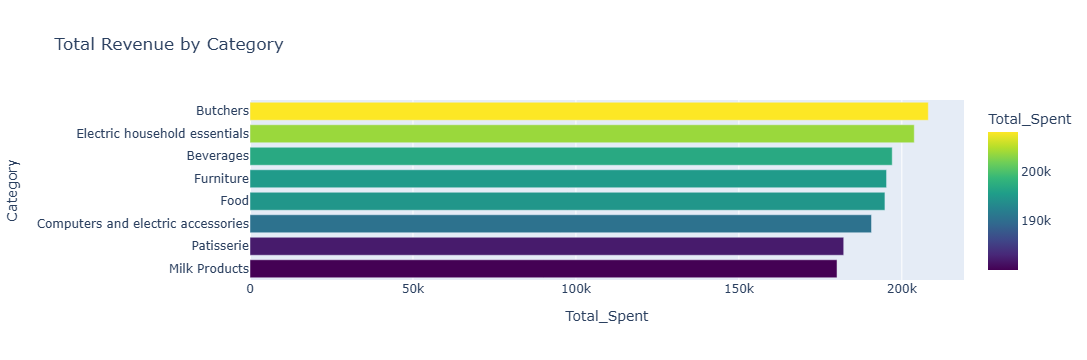

In [59]:
fig1 = px.bar(category_sales, x='Total_Spent', y='Category', orientation='h',
              title='Total Revenue by Category', color='Total_Spent', color_continuous_scale='Viridis')
fig1.update_layout(yaxis={'categoryorder':'total ascending'})

In [75]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['YearMonth'] = df['Transaction_Date'].dt.to_period('M').astype(str)

In [77]:
monthly_txn = df.groupby('YearMonth').size().reset_index(name='Transaction_Count')

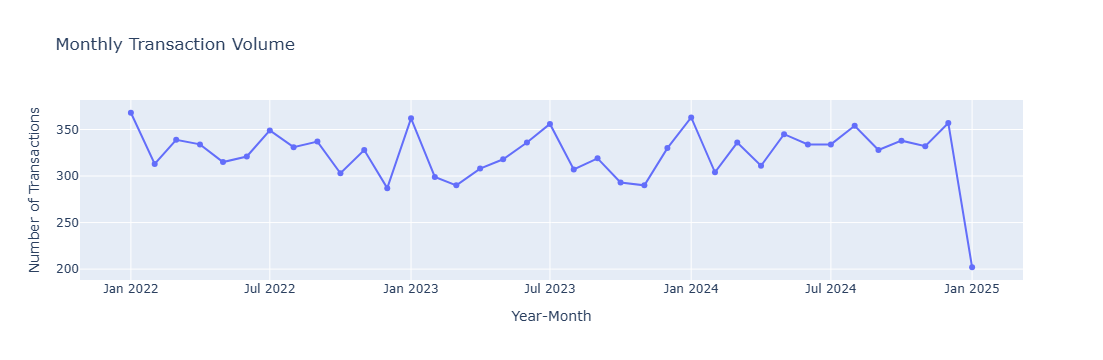

In [79]:
fig2 = px.line(monthly_txn, x='YearMonth', y='Transaction_Count', markers=True,
               title='Monthly Transaction Volume')
fig2.update_layout(xaxis_title='Year-Month', yaxis_title='Number of Transactions')

In [81]:
payment_counts = df['Payment_Method'].value_counts().reset_index()
payment_counts.columns = ['Payment_Method', 'Count']

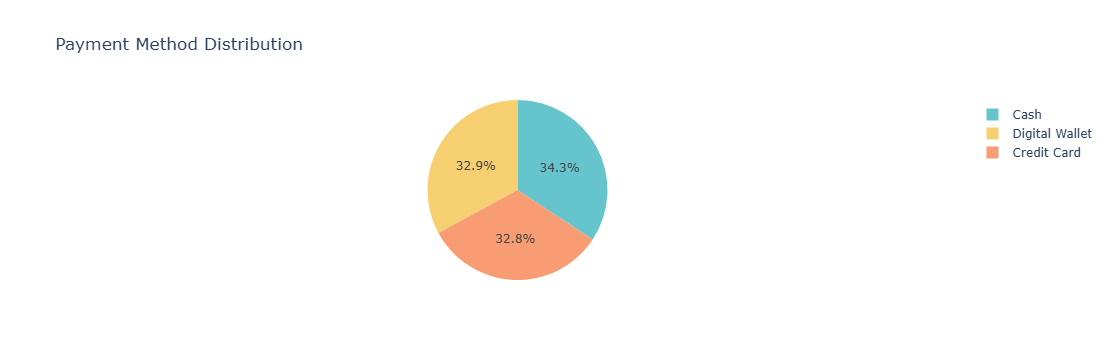

In [85]:
px.pie(payment_counts, values='Count', names='Payment_Method',
              title='Payment Method Distribution', color_discrete_sequence=px.colors.qualitative.Pastel)

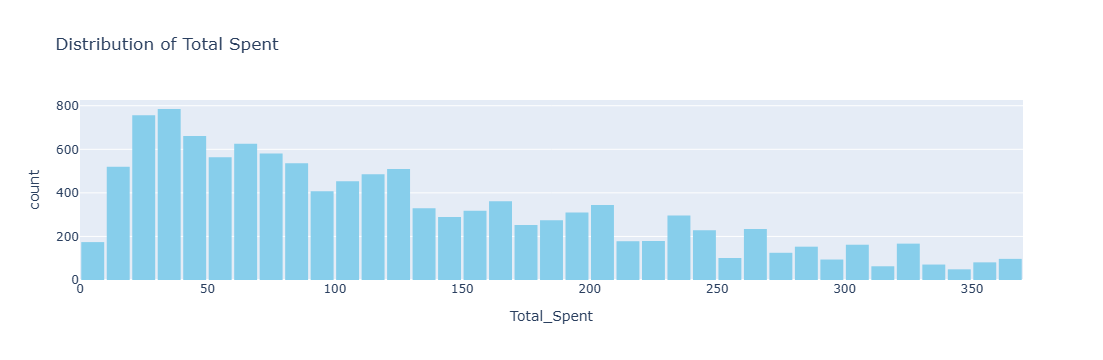

In [87]:
fig4 = px.histogram(df[df['Total_Spent'] < df['Total_Spent'].quantile(0.99)],
                    x='Total_Spent', nbins=50, title='Distribution of Total Spent',
                    color_discrete_sequence=['skyblue'])
fig4.update_layout(bargap=0.1)

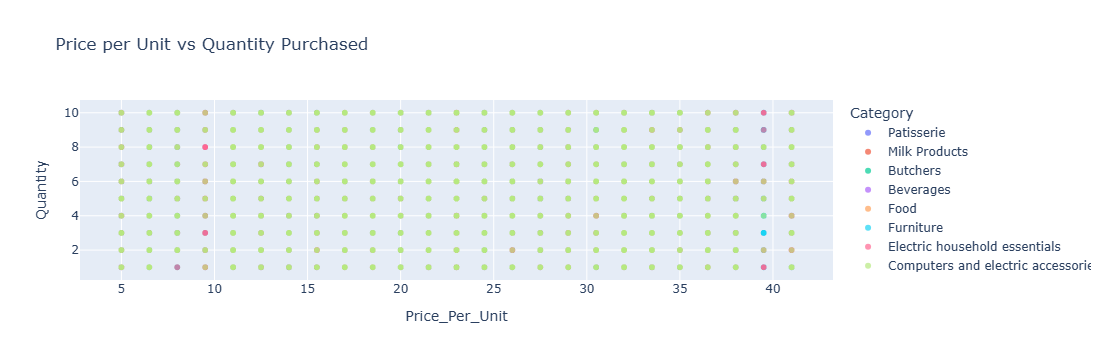

In [89]:
px.scatter(df, x='Price_Per_Unit', y='Quantity', color='Category',
                  title='Price per Unit vs Quantity Purchased', opacity=0.7,
                  hover_data=['Item', 'Total_Spent'])